In [5]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import langdetect

# Settings
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("pastel")

# Load dataset
df = pd.read_csv("multitude_v3_clean.csv")
print("✅ Dataset Loaded Successfully")
print(f"Shape: {df.shape}")
df.head()

✅ Dataset Loaded Successfully
Shape: (206330, 8)


,Unnamed: 0,text,label,multi_label,split,language,length,source
0,0,Якщо ви розумітельний сайт забезпечення продук...,1,opt-iml-max-30b,train,uk,26,MULTITuDE_MassiveSumm_interfax
1,1,В ходе дискуссий стороны договорились расширит...,1,aya-101,test,ru,125,MULTITuDE_MassiveSumm_dw
2,2,Az Európai Parlament (EP) bővítési stratégiájá...,1,Llama-2-70b-chat-hf,train,hu,150,MULTITuDE_MassiveSumm_24
3,3,"Da muss einer bizarre Mutproben bestehen, sich...",0,human,train,de,150,MassiveSumm_spiegel
4,4,"""El Ministro de Tecnología de la Información, ...",1,vicuna-13b,train,es,28,MULTITuDE_MassiveSumm_20minutos


In [6]:
# Check columns and missing values
df.info()
df.isnull().sum()

# Basic stats
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206330 entries, 0 to 206329
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   206330 non-null  int64 
 1   text         206330 non-null  object
 2   label        206330 non-null  int64 
 3   multi_label  206330 non-null  object
 4   split        206330 non-null  object
 5   language     206330 non-null  object
 6   length       206330 non-null  int64 
 7   source       206330 non-null  object
dtypes: int64(3), object(5)
memory usage: 12.6+ MB


,Unnamed: 0,text,label,multi_label,split,language,length,source
count,206330.000000,206330,206330.000000,206330,206330,206330,206330.000000,206330
unique,NaN,206330,NaN,8,2,21,NaN,110
top,NaN,Якщо ви розумітельний сайт забезпечення продук...,NaN,aya-101,train,ar,NaN,MULTITuDE_MassiveSumm_dw
freq,NaN,1,NaN,25948,156240,10367,NaN,20306
mean,103164.500000,NaN,0.874255,NaN,NaN,NaN,129.456356,NaN
std,59562.484858,NaN,0.331563,NaN,NaN,NaN,73.480406,NaN
min,0.000000,NaN,0.000000,NaN,NaN,NaN,6.000000,NaN
25%,51582.250000,NaN,1.000000,NaN,NaN,NaN,72.000000,NaN
50%,103164.500000,NaN,1.000000,NaN,NaN,NaN,123.000000,NaN
75%,154746.750000,NaN,1.000000,NaN,NaN,NaN,176.000000,NaN


c:\Users\risho\Documents\PolyDetect\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\risho\Documents\PolyDetect\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


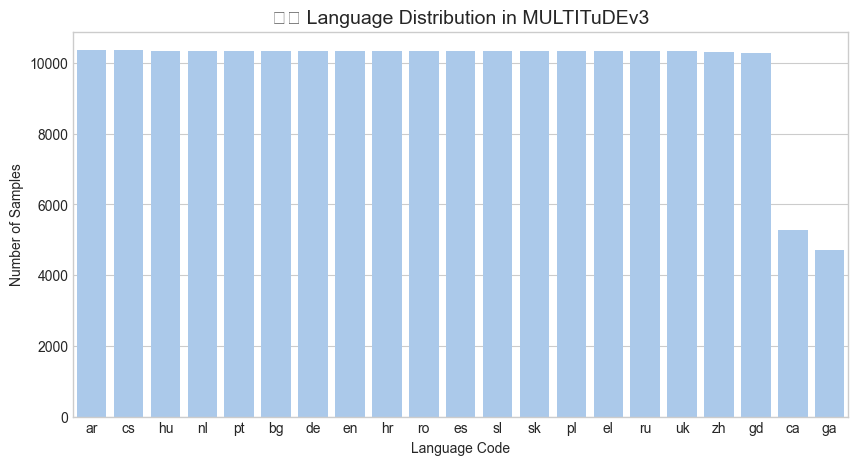

In [7]:
lang_counts = df['language'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title("🗣️ Language Distribution in MULTITuDEv3", fontsize=14)
plt.xlabel("Language Code")
plt.ylabel("Number of Samples")
plt.show()

C:\Users\risho\AppData\Local\Temp\ipykernel_1528\1445121808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')
c:\Users\risho\Documents\PolyDetect\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\risho\Documents\PolyDetect\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


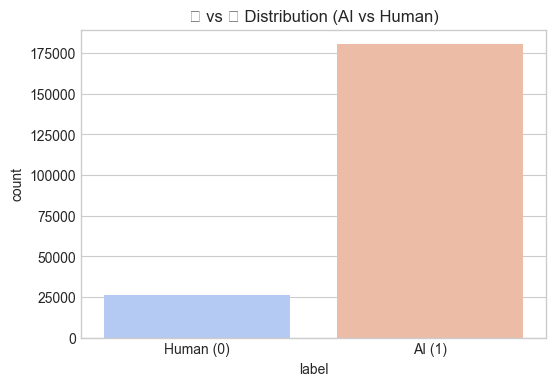

AI-generated texts: 87.43%


In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title("🤖 vs 👤 Distribution (AI vs Human)")
plt.xticks([0,1], ["Human (0)", "AI (1)"])
plt.show()

ai_percent = df['label'].mean() * 100
print(f"AI-generated texts: {ai_percent:.2f}%")

c:\Users\risho\Documents\PolyDetect\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


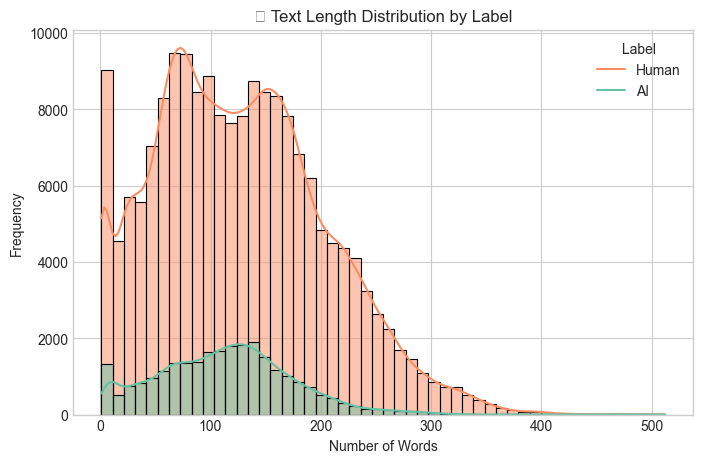

length                                                       
          count        mean        std  min   25%    50%    75%    max
label                                                                 
0       25945.0  113.578532  61.303689  1.0  69.0  114.0  151.0  508.0
1      180385.0  127.198808  77.227915  1.0  68.0  121.0  177.0  512.0

In [9]:
df['length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True, palette='Set2')
plt.title("📝 Text Length Distribution by Label")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend(title='Label', labels=['Human','AI'])
plt.show()

df[['length','label']].groupby('label').describe()

In [10]:
# Random samples from both classes
print("👤 Human-written Example:\n")
print(df[df['label']==0]['text'].sample(1).iloc[0])
print("\n" + "="*80 + "\n")
print("🤖 AI-generated Example:\n")
print(df[df['label']==1]['text'].sample(1).iloc[0])

👤 Human-written Example:

Στα έδρανα της Βουλής θα κριθεί η τύχη κρίσιμων διαρθρωτικών αλλαγών που η κυβέρνηση προωθεί στο πλαίσιο των δεσμεύσεων με την τρόικα, μέσω και του επικαιροποιημένου Μνημονίου.


🤖 AI-generated Example:

Woche nach dem Massenstreik der Lufthansa-Piloten und Flugbegleiter normalisiert sich der Flugbetrieb der Deutschen Lufthansa AG allmählich. Trotz des eingeschränkten Angebots an Flügen verzeichnet die Fluggesellschaft seit einigen Tagen wieder regelmäßige Abfahrten.Viele Passagiere, die nach dem Streik geplante Reisen absäßen, nutzen die günstigen Verhandlungsergebnisse, die die Piloten und Flugbegleiter mit Lufthansa erreicht haben, und buchen jetzt wieder umsteige- und Fernreisen.


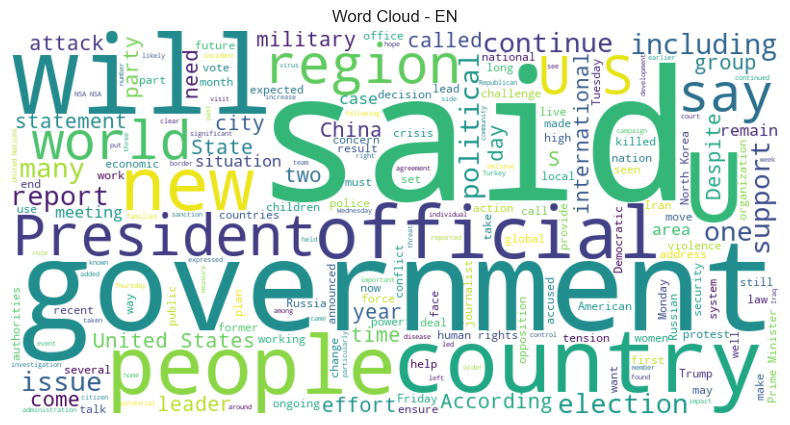

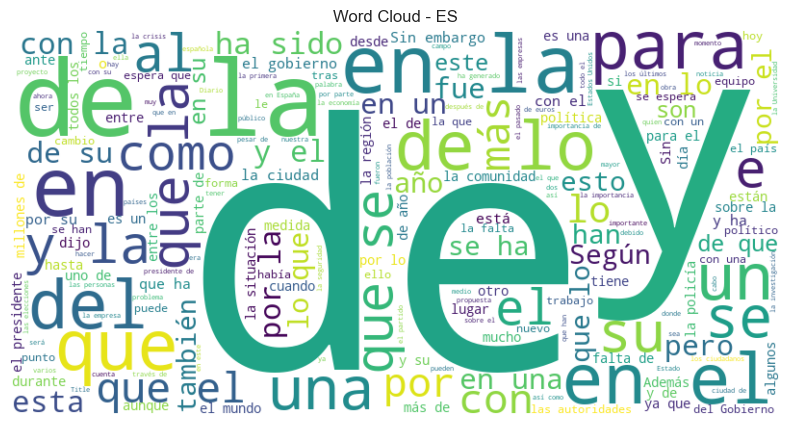

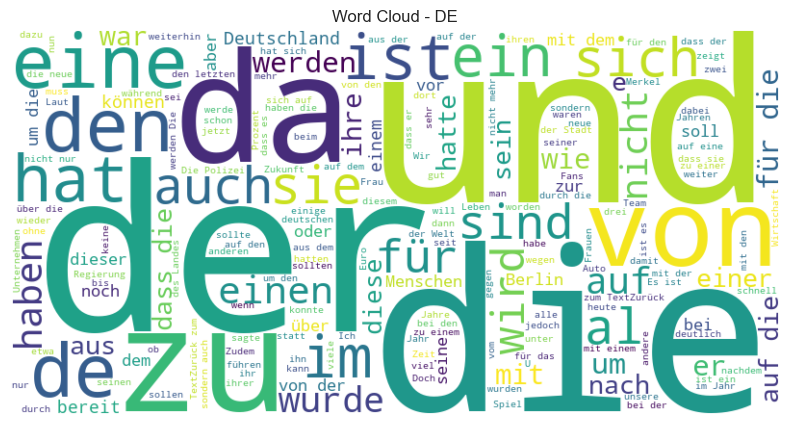

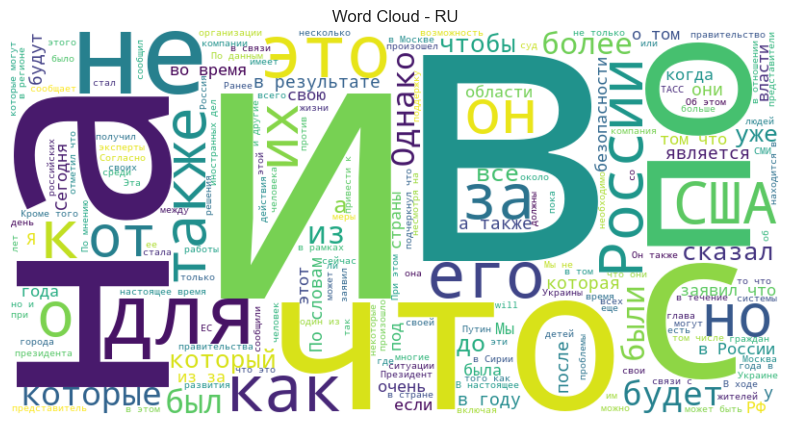

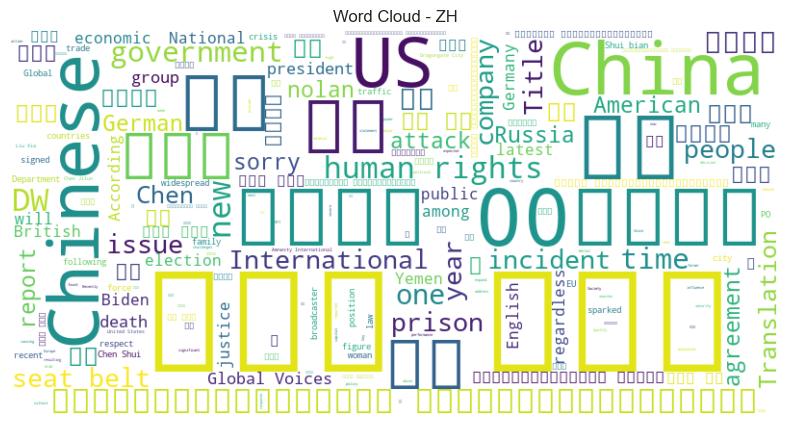

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Updated languages to visualize
langs_to_visualize = ['en', 'es', 'de', 'ru', 'zh']

for lang in langs_to_visualize:
    # Filter valid non-empty text
    text_series = df[df['language'] == lang]['text'].dropna().astype(str)
    text_series = text_series[text_series.str.strip() != '']
    
    if text_series.empty:
        print(f"⚠️ Skipping {lang} — no valid text found.")
        continue
    
    # Concatenate and sample smaller portion for performance
    text_data = " ".join(text_series.sample(min(500, len(text_series)), random_state=42))
    
    # Generate word cloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=STOPWORDS,
        max_words=200,
        font_path=None  # You can set a Chinese font path here if characters don't render
    ).generate(text_data)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - {lang.upper()}")
    plt.show()

c:\Users\risho\Documents\PolyDetect\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


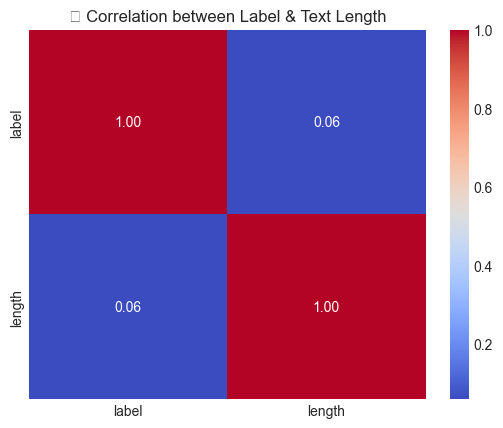

In [12]:
# Correlation with length (proxy for complexity)
corr_df = df[['label','length']].corr()

sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Correlation between Label & Text Length")
plt.show()

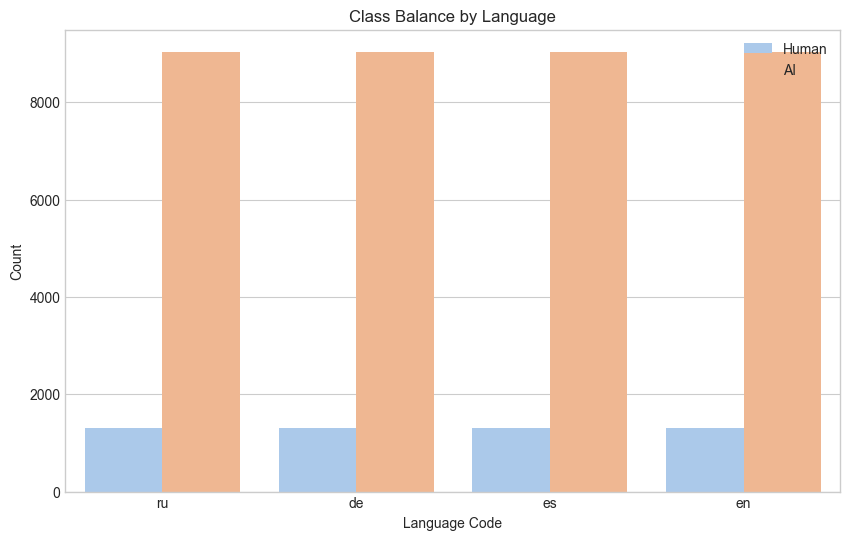

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='language', hue='label', data=df[df['language'].isin(['en','fr','es','de','ru'])], palette='pastel')
plt.title("Class Balance by Language")
plt.xlabel("Language Code")
plt.ylabel("Count")
plt.legend(["Human","AI"])
plt.show()

In [14]:
print("✅ EDA Summary:")
print(f"Total Samples: {len(df)}")
print(f"Languages Covered: {df['language'].nunique()}")
print(f"Average Length: {df['length'].mean():.2f} words")
print(f"AI vs Human ratio: {df['label'].value_counts(normalize=True).to_dict()}")

✅ EDA Summary:
Total Samples: 206330
Languages Covered: 21
Average Length: 125.49 words
AI vs Human ratio: {1: 0.8742548344884409, 0: 0.12574516551155915}
